# 네이버 지식인 - 여친선물 검색

In [28]:
#한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 다시시작

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

In [2]:
#konlpy 설치
!pip install konlpy > /dev/null

In [3]:
!apt-get update > /dev/null 2>&1
!pip install selenium > /dev/null 2>&1
!apt install chromium-chromedriver > /dev/null 2>&1

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [4]:
from tqdm.notebook import tqdm
from urllib.parse import quote

In [8]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')   # 화면없이 실행
options.add_argument('--no-sandbox')
options.add_argument("--single-process")
options.add_argument("--disable-dev-shm-usage")
driver = webdriver.Chrome('chromedriver', options=options)

In [9]:
base_url = 'https://kin.naver.com/search/list.naver?query='
url = base_url + quote('여친선물')
driver.get(url)

In [11]:
answer_list = []
for page in range(1,11):
    print('page', page)
    url = f"{base_url}{quote('여친선물')}&page={page}"
    driver.get(url)
    time.sleep(2)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    lis = soup.select('ul.basic1 > li')

    for li in lis:
        sub_url = li.select_one('a._searchListTitleAnchor')['href']
        driver.get(sub_url)
        time.sleep(2)

        count = int(driver.find_element(By.CSS_SELECTOR, '._answerCount.num').text)
        answer_page = (count -1) // 5
        #print(count, end=', ')
        for i in range(answer_page):
            driver.find_element(By.ID, 'nextPageButton').click()
            time.sleep(2)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        divs = soup.select('div.answer-content__item._contentWrap._answer')
        # print(len(divs))
        for div in divs:
            ps = div.select('p.se-text-paragraph')
            for p in ps:
                text = p.get_text()
                if text == ' ' or text == '\u200b':
                    continue
                answer_list.append(text)
        driver.back()
        time.sleep(2)

page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10


In [12]:
len(answer_list)

3903

In [13]:
driver.close()

In [14]:
with open('new_gift.txt', 'w', encoding='utf-8') as fp:
    for answer in answer_list:
        fp.write(answer + '\n')

# 여친선물 WC

In [5]:
with open('new_gift.txt') as file:
    text = file.read()

In [6]:
#한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()
# kkma = Kkma()
# kr = Komoran()

In [7]:
# 명사 추출
tokens = okt.nouns(text)

In [8]:
tokens[:30]

['풀잎',
 '문화센터',
 '카페',
 '십자수',
 '도안',
 '사용',
 '그림',
 '도안',
 '남친',
 '십자수',
 '것',
 '여자친구',
 '분',
 '생일',
 '선물',
 '제품',
 '고민',
 '제',
 '실제',
 '남친',
 '일주일',
 '사랑',
 '영화',
 '교환일기',
 '추천',
 '여친',
 '번갈아',
 '가면',
 '질문',
 '답']

In [9]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

In [10]:
import nltk
nltk.download('punkt') #코랩에서는 매번 다운함 / 로컬에서는 한번만 실행


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* 다음의 두과정을 반복해서 불용어를 정리

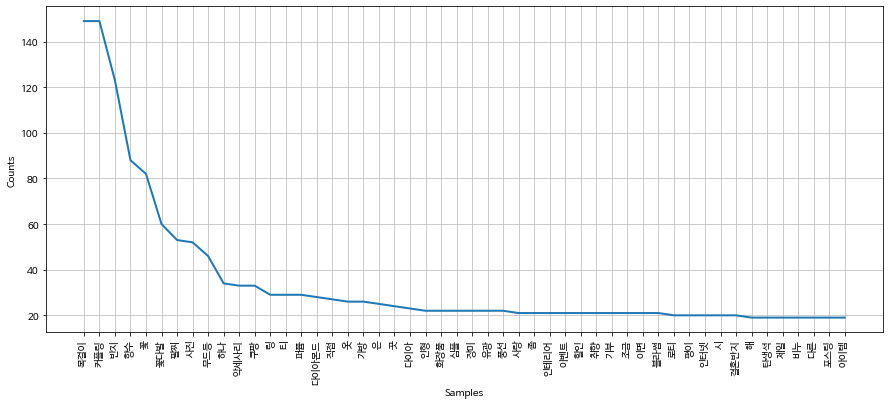

In [24]:
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [21]:
stoptext = ''' 
    선물 추천 여자친구 제품 수 것 확인 가격 저 스 수수료 활동 파트너 여자 준
    가능 개 생일 제 커플 상품 이 때 요 제공 제작 배송 의미 구매 생각 참고 향
    채택 여성 거 링크 디자인 도움 한번 정액 후기 여친 더 브랜드 등 네이버 가지
    인기 답변 통해 하트 친구 용 분 주문 가성 비 고급 마감 세트 위 기념일 고민
    사용 가요 날 구짱 핸드 변경 질문 부담 정말 안쪽 남자 감동 사이트 요즘 중
    그냥 남녀 판매 적립 아래 블로그 포장 각인 처리 이니셜 바로 구성 가장 끗 드라마
    협찬 맞춤 정도 너 사이즈 스토어 무광 일환 마음 케이스 여기 미만 로
'''

In [22]:
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

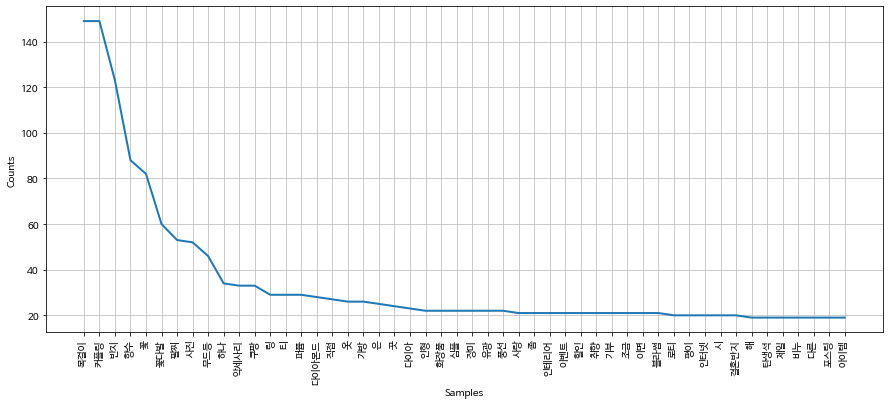

In [25]:
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [26]:
tokens[:10]

['풀잎', '문화센터', '카페', '십자수', '도안', '그림', '도안', '남친', '십자수', '실제']

## 워드크라우드 그리기

In [27]:
from wordcloud import WordCloud
from PIL import Image

In [28]:
data = gift.vocab().most_common(300)
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [29]:
wc = WordCloud(font_path=font_path, relative_scaling=0.2,
               background_color='white').generate_from_frequencies(dict(data))

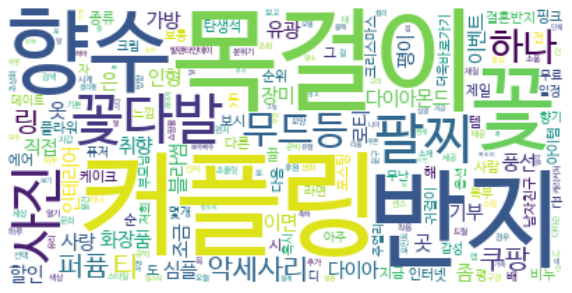

In [30]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

* 하트에 표시

In [31]:
mask = np.array(Image.open('heart.jpg'))

In [33]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [34]:
wc = WordCloud(font_path=font_path, relative_scaling=0.2,
               background_color='white',
               mask=mask,
               min_font_size=1, max_font_size=120
               ).generate_from_frequencies(dict(data))

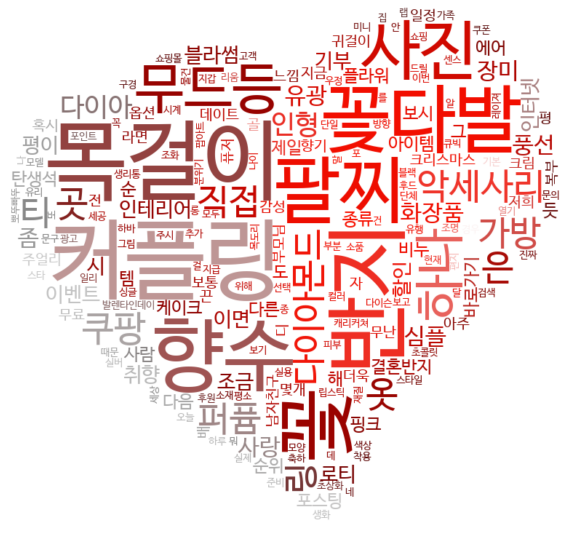

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis('off')
plt.show()